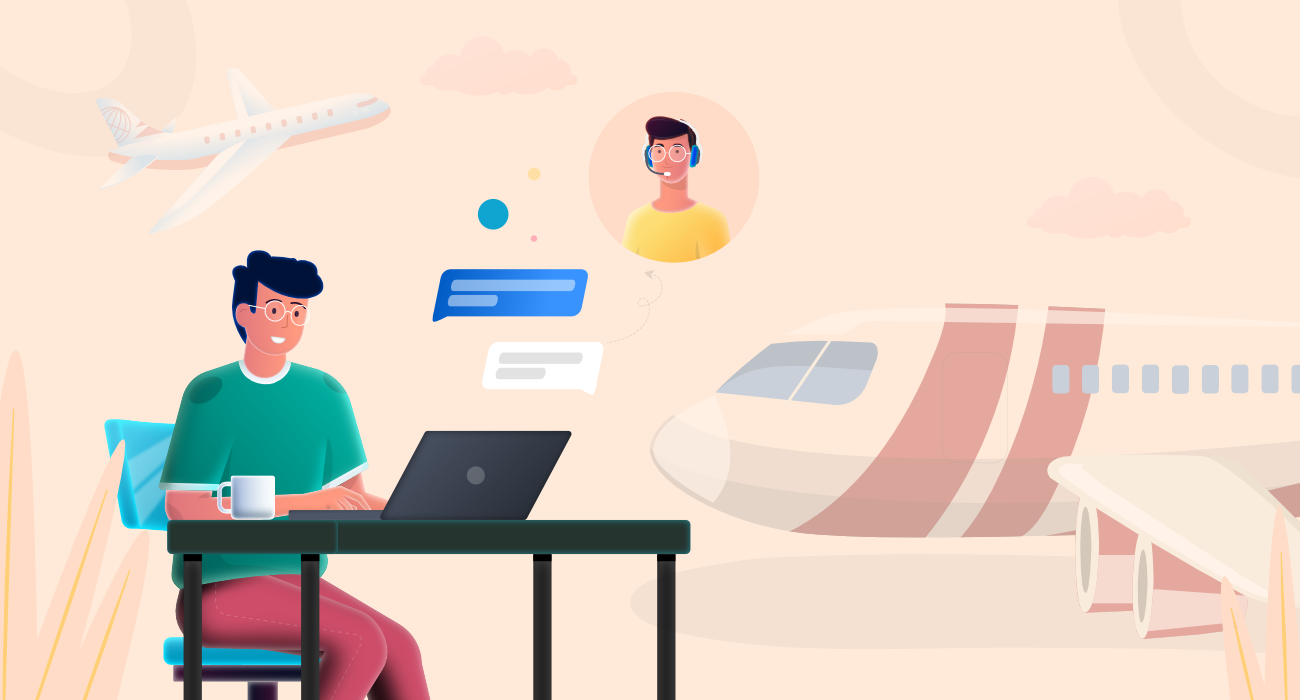

In [12]:
Image('img/principal.png')

# CONTEXTO DO PROBLEMA

O mercado de companhias aéreas é muito competitvo, pois normalmente o grande influenciador na hora da compra é o preço. Geralmente, isso define em qual companhia aérea o cliente optará. Contudo, após a compra, o que influencia se irá retornar a voar novamente na companhia é a experiencia que o cliente terá.

Pensando nisso, os diretores(a) da companhia aérea, chamada Airline, sentaram para discutir a respeito do grande numero de clientes insastifeitos em seus vôos. Eles decidiram que precisam melhorar/mudar seus serviços. Para isso, querem uma análise para identificar as causas das insatisfações e o que deverá ser melhorarado ou mudado.

## ENTENDIMENTO DO NEGÓCIO


#### Problema do Negócio:

- Identificar o que deve ser melhorado visando garantir diminuir a insatisfação dos passageiros.

#### Entrega final: 

- Arquivo Excel com os resultados.

#### Dados para resolver o problema:

- Kaggle

## 1.0 IMPORTAÇÕES

In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from scipy import stats

### 1.1 Funções Auxiliares

In [3]:
paleta1 = ['#87cefa']
paleta2 = ['#f08080','#87cefa']
paleta3 = ['#f08080', '#87cefa', '#74e3a0']
paleta4 = ['#f08080', '#87cefa', '#82ffb4', '#deb1fc', '#ffbe9e']


def feature_engineering(grade):
    
    if grade <= 2:
        return 'bad'
    
    elif grade == 3:
        return 'medium'
    
    else:
        return 'good'
    

def univariate_analysis(col1, col2, col3, data):
        
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    sns.countplot(x=col1, data=data, palette=paleta2, ec='k')
    plt.xlabel('')
    plt.ylabel('')
    plt.title(col1)

    plt.subplot(1, 3, 2)
    sns.countplot(x=col2, data=data, palette=paleta3, ec='k')
    plt.xlabel('')
    plt.ylabel('')
    plt.title(col2)
        
    plt.subplot(1, 3, 3)
    sns.countplot(x=col3, data=data, palette=paleta3, ec='k')
    plt.xlabel('')
    plt.ylabel('')
    plt.title(col3)    
    
    
def bivariate_analysis(data, columns, hue, title):
    
    paleta = ['#f08080','#87cefa', '#74e3a0']
    count = 0
        
    for col in columns:
        count += 1
        
        if count == 1:
            
            plt.figure(figsize=(15, 3))
            plt.subplot(1, 2, 1)
            sns.countplot(x=col, data=data, ec='k', palette=paleta)
            plt.xlabel('')
            plt.title(col)
            plt.plot()
            
            plt.subplot(1, 2, 2)
            sns.countplot(x=col, data=data, hue=data[str(hue)], ec='k', palette=paleta)
            plt.xlabel('')
            plt.suptitle(title)
            plt.title(col)
            plt.plot()
        
        else:

            plt.figure(figsize=(15, 3))
            plt.subplot(1, 2, 1)
            sns.countplot(x=col, data=data, ec='k', palette=paleta)
            plt.xlabel('')
            plt.title(col)
            plt.plot()

            plt.subplot(1, 2, 2)
            sns.countplot(x=col, data=data, hue=data[str(hue)], ec='k', palette=paleta)
            plt.xlabel('')
            plt.title(col)
            plt.plot()
        
        
def cramer_v(x, y):
    
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))


def show_matrix(col, data, output='list'):

    rows = []
    index = []
    columns = []

    for c in data.columns:

        result = cramer_v(x=data[str(col)], y=data[str(c)])

        rows.append(result)
        index.append(str(c))
        columns.append(str(col))
        
    if output == 'list':
        return rows
    
    elif output == 'dict':
        return pd.DataFrame(rows, index=index, columns=[str(col)])
    
    else:
        print('\033[31mValueError: output must be either "list" or "dict"')

### 1.2 Carregamento dos Dados

In [4]:
data = pd.read_csv('data/Invistico_Airline.csv')
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## 2.0 DESCRIÇÃO DOS DADOS

### 2.1 Renomeando Colunas

In [5]:
cols_old = ['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
            'Class', 'Flight Distance', 'Seat comfort', 
            'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
            'Inflight wifi service', 'Inflight entertainment', 'Online support',
            'Ease of Online booking', 'On-board service', 'Leg room service',
            'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
            'Departure Delay in Minutes', 'Arrival Delay in Minutes']

snakecase = lambda x: x.replace(' ', '_').replace('-', '_').replace('/', '_').lower()
cols_new = list(map(snakecase, cols_old))

data.columns = cols_new
data.columns

Index(['satisfaction', 'gender', 'customer_type', 'age', 'type_of_travel',
       'class', 'flight_distance', 'seat_comfort',
       'departure_arrival_time_convenient', 'food_and_drink', 'gate_location',
       'inflight_wifi_service', 'inflight_entertainment', 'online_support',
       'ease_of_online_booking', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'cleanliness', 'online_boarding',
       'departure_delay_in_minutes', 'arrival_delay_in_minutes'],
      dtype='object')

### 2.2 Dimensão de Dados

In [6]:
n_row = data.shape[0]
n_col = data.shape[1]

print(f'Qtd. de linhas: {n_row}')
print(f'Qtd. de colunas {n_col}')

Qtd. de linhas: 129880
Qtd. de colunas 23


### 2.3 Tipo de Dados

In [7]:
data.dtypes

satisfaction                          object
gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
class                                 object
flight_distance                        int64
seat_comfort                           int64
departure_arrival_time_convenient      int64
food_and_drink                         int64
gate_location                          int64
inflight_wifi_service                  int64
inflight_entertainment                 int64
online_support                         int64
ease_of_online_booking                 int64
on_board_service                       int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
cleanliness                            int64
online_boarding                        int64
departure_delay_in_minutes             int64
arrival_de

### 2.4 Verificação de NaN

In [8]:
data.isna().sum()

satisfaction                           0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure_arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
on_board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
dtype: int64

### 2.5 Preenchimento de NaN

Será divido o preenchimento de NaN em 2 etapas. Primeiro, assumiremos que não há vôos cancelados, devido a coluna 'departure_delay_in_minutes' indicar o atraso de **partida** do avião, está não possui NaN.

Com isso, identificaremos o maior caso de atraso na partida, mas que ainda assim o avião chegou **sem atraso** no destino. Assumiremos que atrasos de partida menor que este caso, o avião chegará no horario.

In [9]:
arrivalOk_departureDelay = data[(data['arrival_delay_in_minutes'] == 0.0) & (data['departure_delay_in_minutes'] > 1)]

delay_max = arrivalOk_departureDelay['departure_delay_in_minutes'].max()

no_delay = data[['arrival_delay_in_minutes', 'departure_delay_in_minutes']].apply(
                lambda x: 0.0 if pd.isna(x['arrival_delay_in_minutes']) 
                              and x['departure_delay_in_minutes'] <= delay_max 
                              else x['arrival_delay_in_minutes'], axis=1
)

data['arrival_delay_in_minutes'] = no_delay

data.isna().sum()

satisfaction                           0
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
seat_comfort                           0
departure_arrival_time_convenient      0
food_and_drink                         0
gate_location                          0
inflight_wifi_service                  0
inflight_entertainment                 0
online_support                         0
ease_of_online_booking                 0
on_board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
cleanliness                            0
online_boarding                        0
departure_delay_in_minutes             0
arrival_delay_in_minutes             102
dtype: int64

Um dos principais influenciadores na hora da chegada, é o horario que o avião saiu, então será usado isso no preenchimento. Nessa atapa, identificaremos a mediana sobre a diferença de partida e chegada do avião em vôos que possuiram algum atraso. Para preencher, a mediana será somada com cada atrsaso de partida.

In [10]:
median_diference_delay = data[['departure_delay_in_minutes', 'arrival_delay_in_minutes']].apply(
        lambda x: (x['arrival_delay_in_minutes'] - x['departure_delay_in_minutes']) if pd.notnull(x['arrival_delay_in_minutes']) 
                                                                                    and x['arrival_delay_in_minutes'] > 0 
                                                                                    and x['departure_delay_in_minutes'] > 0 
                                                                                    else np.nan, axis=1).median()

arrival_subs = data[['departure_delay_in_minutes', 'arrival_delay_in_minutes']].apply(
    lambda x: (x['departure_delay_in_minutes'] + median_diference_delay) 
        if pd.isnull(x['arrival_delay_in_minutes']) else x['arrival_delay_in_minutes'], axis=1
)

data['arrival_delay_in_minutes'] = arrival_subs

data.isna().sum()

satisfaction                         0
gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
seat_comfort                         0
departure_arrival_time_convenient    0
food_and_drink                       0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
on_board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
dtype: int64

### 2.6 Estatistica Descritiva

#### 2.6.1 Atributos Numéricos

In [11]:
num_atributes = data.select_dtypes(include=['int64', 'float64'])

describe = num_atributes.describe().T

skew = num_atributes.apply(lambda x: x.skew())
kurtosis = num_atributes.apply(lambda x: x.kurtosis())

describe['skew'] = skew
describe['kurtosis'] = kurtosis

describe

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0,-0.003606,-0.719140
flight_distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0,0.466748,0.364306
seat_comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0,-0.091861,-0.943193
departure_arrival_time_convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0,-0.252282,-1.089371
food_and_drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0,-0.116813,-0.986728
gate_location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0,-0.053064,-1.089822
inflight_wifi_service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0,-0.191123,-1.121446
inflight_entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0,-0.604828,-0.532786
online_support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0,-0.575365,-0.810572
ease_of_online_booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0,-0.491720,-0.910654


Em termos de distribuição, as variaveis **departure_delay_in_minutes** e **arrival_delay_in_minutes** possuem uma skew longe de 0, indicando estar bem distante de uma distribuição normal e distante da média. Já **age** e **flight_distance** estão bem próximas da distribuição normal e com uma kurtosis próxima de 1, indicando ter um pico grande.

Em termos de Negócio, a média de atraso é cerca de 15 minutos e a idade média dos passageiros é de 39 anos. 50% dos vôos são de 1.925km de distancia e os pasageiros atribuem em média nota 2 e 3 para os serviços em geral da companhia aérea.

#### 2.6.2 Atributos Categóricos

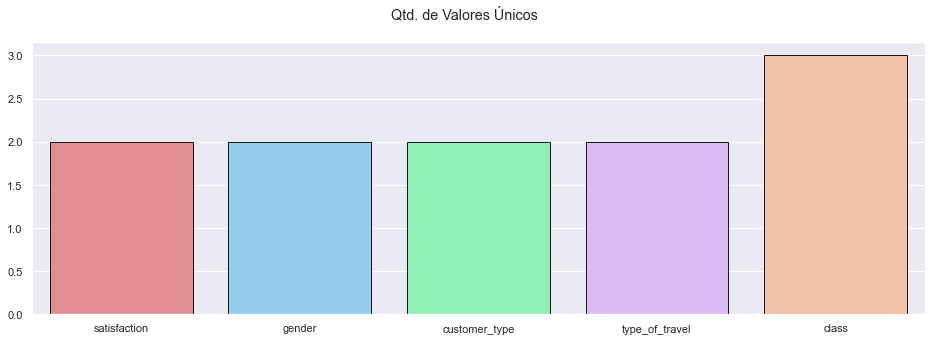

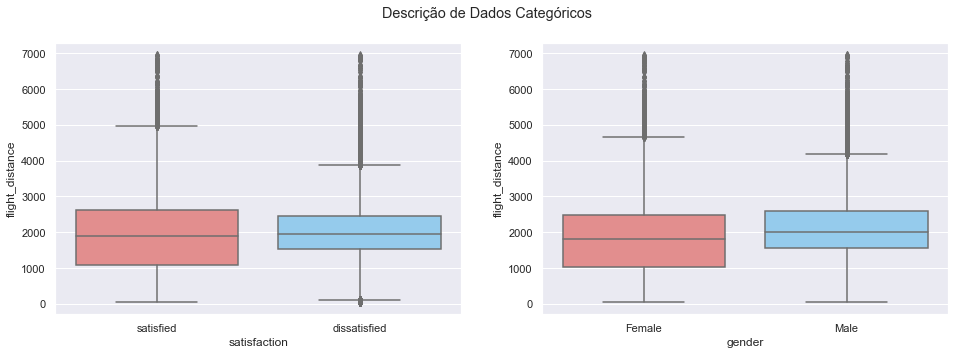

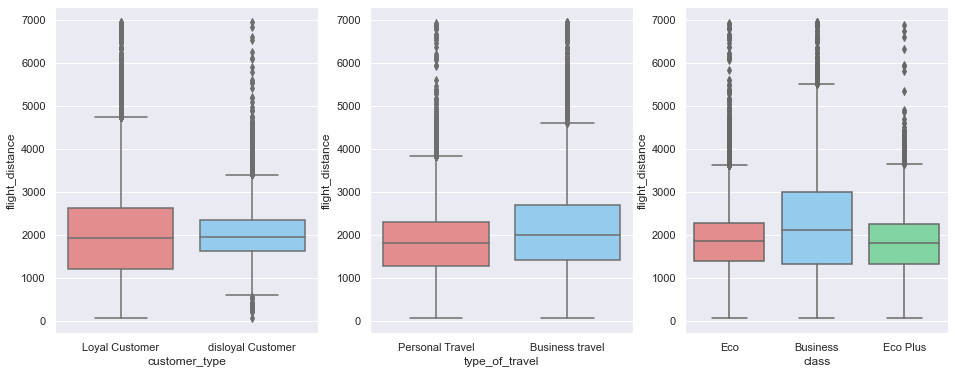

In [12]:
cat_atributes = data.select_dtypes(include=['object'])

unique_values = cat_atributes.apply(lambda x: x.unique().shape[0])

plt.figure(figsize=(16, 5))
sns.barplot(x=unique_values.index, y=unique_values.values, palette=paleta4, ec='k')
plt.suptitle('Qtd. de Valores Únicos')


plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='satisfaction', y='flight_distance', data=data, palette=paleta2)
plt.suptitle('Descrição de Dados Categóricos')

plt.subplot(1, 2, 2)
sns.boxplot(x='gender', y='flight_distance', data=data, palette=paleta2)

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='customer_type', y='flight_distance', data=data, palette=paleta2)

plt.subplot(1, 3, 2)
sns.boxplot(x='type_of_travel', y='flight_distance', data=data, palette=paleta2)

plt.subplot(1, 3, 3)
sns.boxplot(x='class', y='flight_distance', data=data, palette=paleta3);

Os atributos categóricos em geral possuem 2 ou 3 niveis de possiveis valores. A mediana da distancia de vôos para passageiros satisfeitos e insatisfeitos são bem próximas, mas os sastifeitos fazem vôos com distancias maiores. Em relação ao sexo, no geral, as mulheres realizam vôos com distancias maiores.

Para os tipos de clientes, a mediana de distancia é igual, porém clientes fiéis realizam maiores viagens e também mais viagens de curta distancia, diferente dos clientes inféis que a distancia minima é próxima de 1000km. Em tipo de viagem realizada, viagens de negócios possuem maior mediana e também distancias maiores. Já em classes, Eco e Eco Plus em 75% dos vôos possuem distâncias bem próximas, já pessoas que usam a classe de Negócios normalmente realizam viagens com distancias bem maiores.

## 3.0 LEVANTAMENTO DE HIPÓTESES

### 3.1 Mapa Mental de Hipóteses

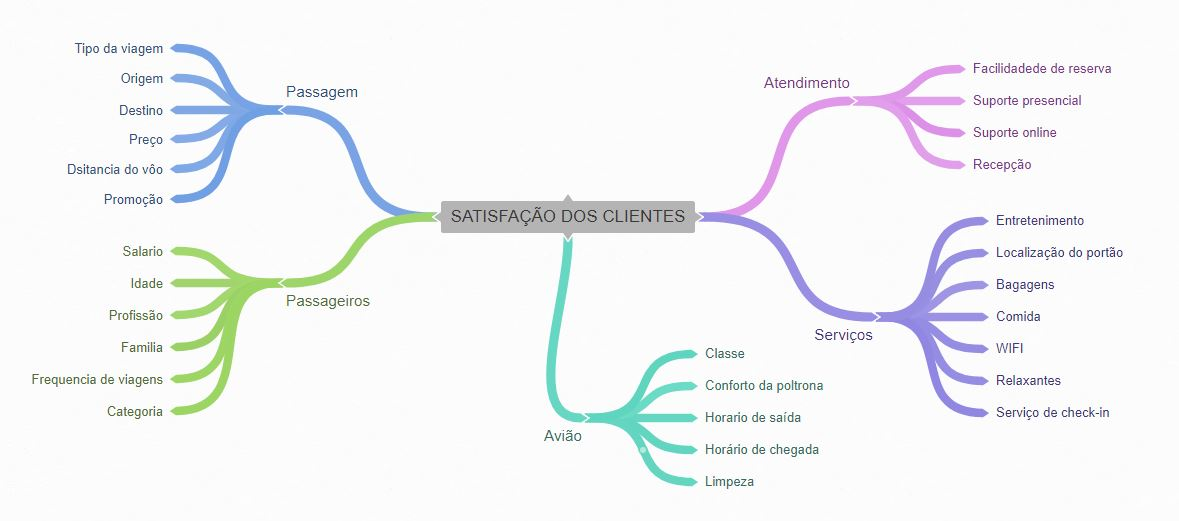

In [13]:
Image('img/mindmap.JPG')

### 3.2 Criação de Hipóteses

#### 3.2.1 Hipóteses Passageiros

**1.** Passageiros com idade menor que 30 anos possuem maior satisfação.


**2.** Passageiros que realizam viagens de negócio possuem maior satisfação.


**3.** Passageiros da classe Eco possuem menor satisfação.

#### 3.2.2 Hipóteses Passagem

**4.** Viagens com distancias menores possuem mais passageiros satisfeitos.

#### 3.2.3 Hipóteses Avião

**5.** Aviões com poltronas mais confortaveis possuem passageiros mais satisfeitos.

**6.** Aviões que saem com atrasos curtos possuem mais passageiros insatisfeitos.

**7.**. Aviões que saem com atrsasos longos possuem mais passageiros insatisfeitos.

**8.** Aviões com maior cuidado em limpeza possuem mais passageiros satisfeitos.

#### 3.2.4 Hipóteses Serviços

**9.** Vôos com bom entretenimento possuem maior satisfação.

**10.** Vôos com melhor localização do portão de embarque possuem maior satisfação.

**11.** Vôos com melhor manuseio de bagagens possuem maior satisfação.

**12.** Vôos com boa comida e bebida possuem maior satisfação.

**13.** Vôos com Wi-fi no avião possuem maior satisfação.

**14.** Vôos com bons serviços de quarto possuem maior satisfação.

**15.** Vôos com melhores serviçoes de check-in possuem maior satisfação.

#### 3.2.4 Hipóteses Atendimento

**16.** Atendimentos com maior dificuldade na reserva possuem menos clientes satisfeitos.

**17.** Atendimentos com piores suportes online possuem menos clientes satisfeitos.

**18.** Atendimento com piores Onboards possuem menos clientes satisfeitos.

**19.** Atendimento com piores Onboards online possuem menos clientes satisfeitos.

## 4.0 FEATURE ENGINEERING

In [14]:
columns = ['seat_comfort', 'departure_arrival_time_convenient', 'food_and_drink', 
           'gate_location', 'inflight_wifi_service', 'inflight_entertainment', 
           'online_support', 'ease_of_online_booking', 'on_board_service',
           'leg_room_service', 'baggage_handling', 'checkin_service', 
           'cleanliness', 'online_boarding']

for col in columns:
    data[col] = data[col].apply(feature_engineering)
    
    
flight_distance_mean = data['flight_distance'].mean()
data['type_flight'] = data['flight_distance'].apply(lambda x: 'long' if x > flight_distance_mean else 'short')


departure_delay_mean = data[data['departure_delay_in_minutes'] > 0]['departure_delay_in_minutes'].mean()
data['type_departure_delay'] = data['departure_delay_in_minutes'].apply(lambda x: 'no_delay' if x == 0 else 'long' if x > departure_delay_mean else 'short')


arrival_delay_mean = data[data['arrival_delay_in_minutes'] > 0]['arrival_delay_in_minutes'].mean()
data['type_arrival_delay'] = data['arrival_delay_in_minutes'].apply(lambda x: 'no_delay' if x == 0 else 'long' if x > arrival_delay_mean else 'short')

## 5.0 ANÁLISE EXPLORATÓRIA DOS DADOS

### 5.1 Análise Univariada

#### 5.1.2 Variavel Principal

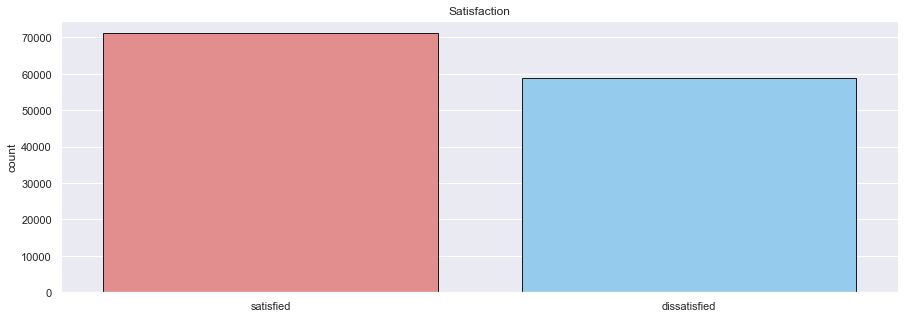

In [15]:
plt.figure(figsize=(15, 5))
sns.countplot(x='satisfaction', data=data, ec='k', palette=paleta2)
plt.xlabel('')
plt.title('Satisfaction');

Mesmo a companhia aérea Airline possuindo mais passageiros satisfeitos, a quantidade de passageiros que demonstram insatisfação ainda é alta. Uma diferença em cerca de 1200 passageiros. Interessante notar que, 45% das pessoas que voaram com a Arline foram insatisfeitas.

#### 5.1.3 Variavel Numérica

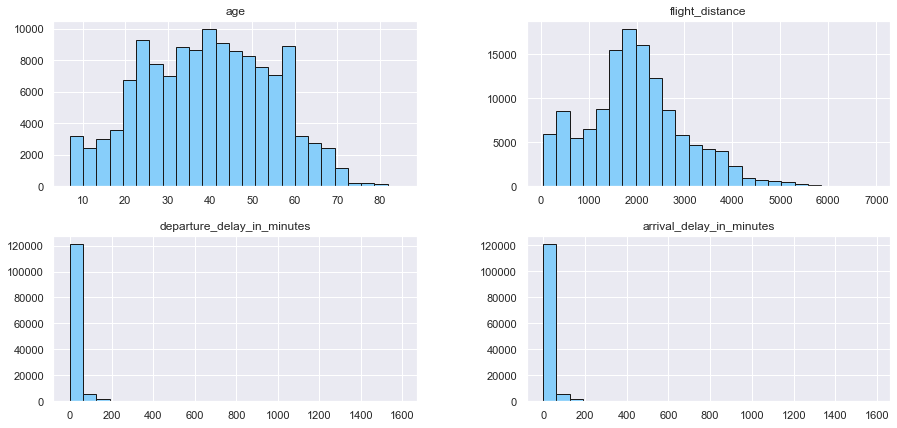

In [16]:
num_atributes = data.select_dtypes(include=['int64', 'float64'])
num_atributes.hist(figsize=(15, 7), ec='k', bins=25, color=paleta1);

As idades estão bem próximas de uma distribuição simétrica perfeita possuindo a média, mediana e moda muito parecidas e com uma curtose Leptocurtica. O pico das idades dos passageiros são entre 21 e 60 anos. Nas distancias dos vôos a distribuição é assimétrica positiva com a média sendo maior que a mediana e a moda possuindo a curtose platicurtica. Os passageiros fazem mais viagens com distâncias entre 1200km e 2800km. Os atrasos de partida e chegada possuem também uma distribuição assimétrica positiva. Os atrasos não possuem um grande range de valores, mosntrando maior concentração.

#### 5.1.4 Variavel Categórica

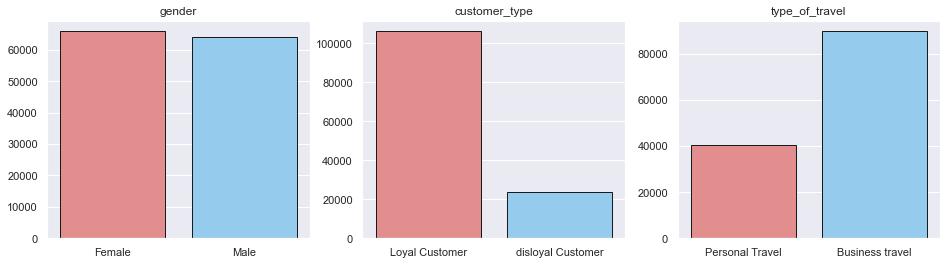

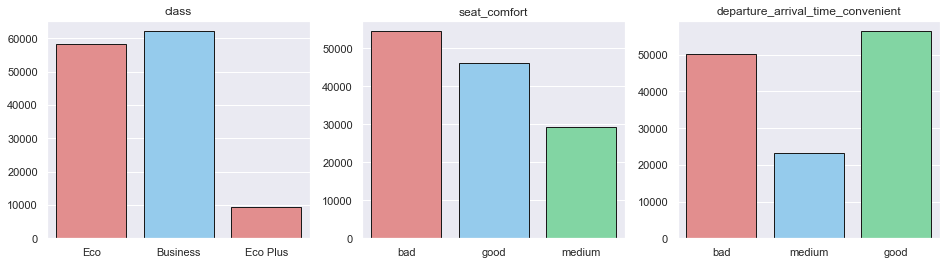

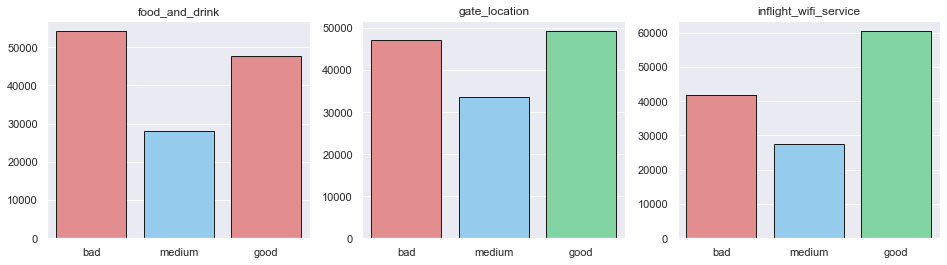

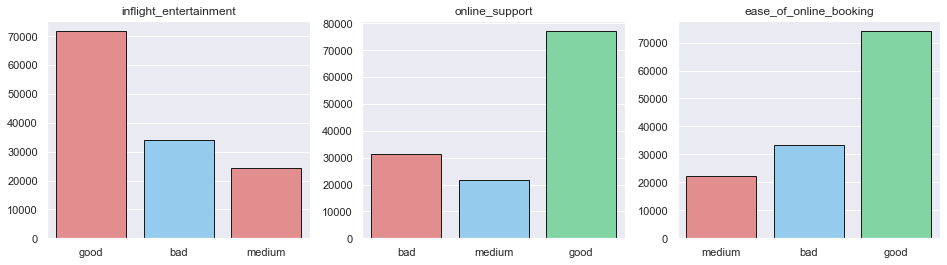

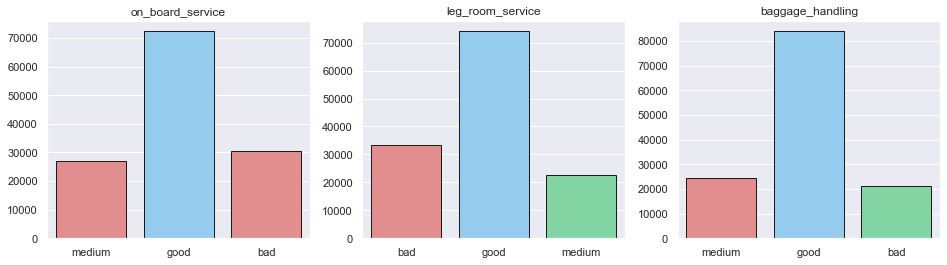

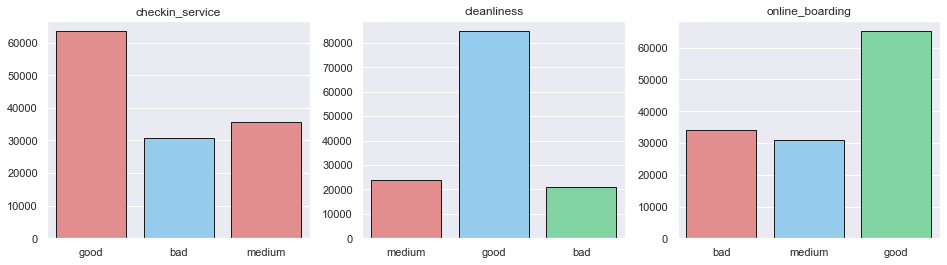

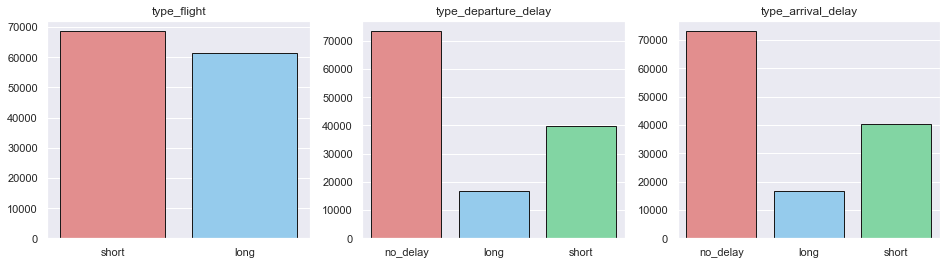

In [17]:
categories = data.select_dtypes(include='object')

univariate_analysis(col1='gender', col2='customer_type', col3='type_of_travel', data=data)
univariate_analysis(col1='class', col2='seat_comfort', col3='departure_arrival_time_convenient', data=data)
univariate_analysis(col1='food_and_drink', col2='gate_location', col3='inflight_wifi_service', data=data)
univariate_analysis(col1='inflight_entertainment', col2='online_support', col3='ease_of_online_booking', data=data)
univariate_analysis(col1='on_board_service', col2='leg_room_service', col3='baggage_handling', data=data)
univariate_analysis(col1='checkin_service', col2='cleanliness', col3='online_boarding', data=data)
univariate_analysis(col1='type_flight', col2='type_departure_delay', col3='type_arrival_delay', data=data)

- <ins>Sexo dos passageiros</ins> | <ins>Tipo de cliente</ins> | <ins>Tipo de viagem:</ins>: A distribuição de sexo dos passageiros está bem distribuida. 85% dos passageiros da companhia são clientes Fiéis e apenas 18% Infiéis. 69% dos passageiros realizam viagens de Negócio e apenas 31% realizam viagens pessoais.


- <ins>Classe dos passageiros</ins> | <ins>Conforto da poltrona</ins> | <ins>Horario de chegada/partida conveniente</ins>:47% dos passageiros viajam na classe Business e 44% na classe Eco. Já na classe Eco Plus, menos de 1% dos passageiros viajam nela. 41% dos passageiros informaram que o conforto da poltrona é ruim, 35% disseram que é bom e 22% que é mediano. 43% dos passageiros informaram que o horario conveniente é bom, 38% disseram que é ruim e 17% que é mediano.


-  <ins>Comida e bebida</ins> | <ins>Localização do portão</ins> | <ins>Serviço Wifi no avião</ins>: 41% dos passageiros informaram que a comida e bebida do avião é ruim, 36% disseram que é boa e 21% que é mediano. 37% dos passageiros informaram que a localização do portão é boa, 36% disseram que é ruim e 25% que é mediano. 46% dos passageiros informaram que o Wifi no avião é bom, 32% disseram que é ruim e 21% que é mediano.


-  <ins>Entretenimento no vôo</ins> | <ins>Suporte online</ins> | <ins>Facilidade de reserva</ins>: 55% dos passageiros informaram que o entretenimento é bom, 26% disseram que é ruim e 18% que é mediano. 59% dos passageiros informaram que o suporte online é bom, 24% disseram que é ruim e 16% que é mediano. 57% dos passageiros informaram que a facilidade de reserva é boa, 25% disseram que é ruim e 17% que é mediano.


-  <ins>Serviço onboard</ins> | <ins>Serviço de quarto de pernas</ins> | <ins>Manuseio de bagagem</ins>: 55% dos passageiros informaram que o serviço onboard é bom, 23% disseram que é ruim e 20% que é mediano. 57% dos passageiros informaram que o serviço de quarto de perna é bom, 25% disseram que é ruim e 17% que é mediano. 64% dos passageiros informaram que o manuesio de bagagem é bom, 16% disseram que é ruim e 18% que é mediano.


-  <ins>Serviço de check-in</ins> | <ins>Limpeza do avião</ins> | <ins>Serviço onboard online</ins>: 48% dos passageiros informaram que o serviço de check-in é bom, 23% disseram que é ruim e 27% que é mediano. 65% dos passageiros informaram que a limpeza do avião é boa, 16% disseram que é ruim e 18% que é mediano. 50% dos passageiros informaram que o serviço onboard online é bom, 26% disseram que é ruim e 23% que é mediano.
 

- <ins>Tipo de Vôo:</ins> | 52% dos Vôos são de curta distância e 47% de longa distancia.


-  56% dos vôos não possuem atraso na saída do avião. 30% possuem atrasos curtos e 12% atrasos longos.


- <ins>Tipo de atraso na chegada:</ins> Os numeros dos atrasos na chegada são iguais aos atrasos na partida. Visto que o influenciador do horario de chegada é o horario em que o avião sairá.

### 5.2 Análise Bivariada

### H1. Passageiros com idade menor que 30 anos possuem maior satisfação.

**FALSA** Passageiros com idade MAIOR que 30 anos possuem MAIOR satisfação.

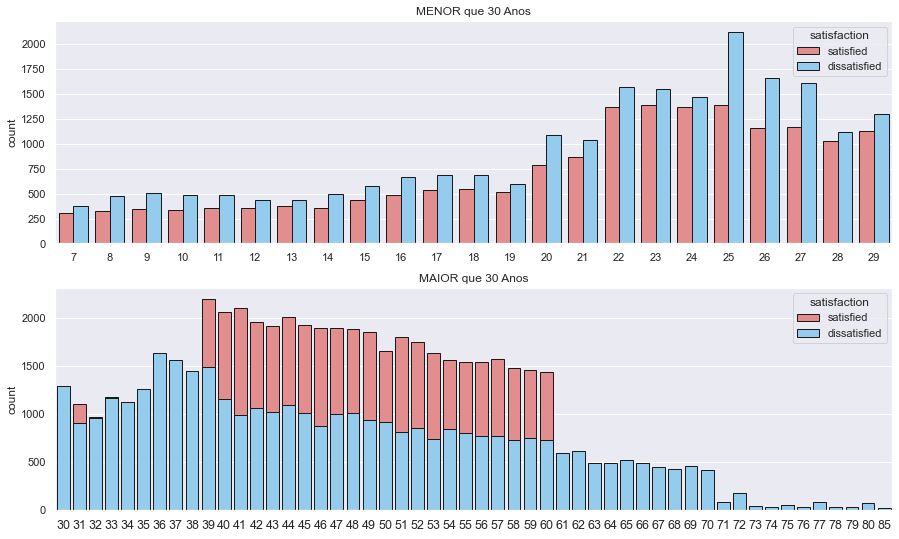

In [18]:
plt.figure(figsize=(15, 9))
plt.subplot(2, 1, 1)
new = data[data['age'] < 30]
sns.countplot(x='age', data=new, hue=new['satisfaction'], ec='k', palette=paleta2)
plt.title('MENOR que 30 Anos')
plt.xlabel('')

plt.subplot(2, 1, 2)
old = data[data['age'] >= 30]
sns.countplot(x='age', data=old, hue=old['satisfaction'], ec='k', palette=paleta2, dodge=False, )
plt.title('MAIOR que 30 Anos')
plt.xlabel('')
plt.xticks(fontsize=12.5);

### H2. Passageiros que realizam viagens de negócio possuem maior satisfação.

**VERDADEIRA** Passageiros que realizam viagens de negócio possuem MAIOR satisfação.

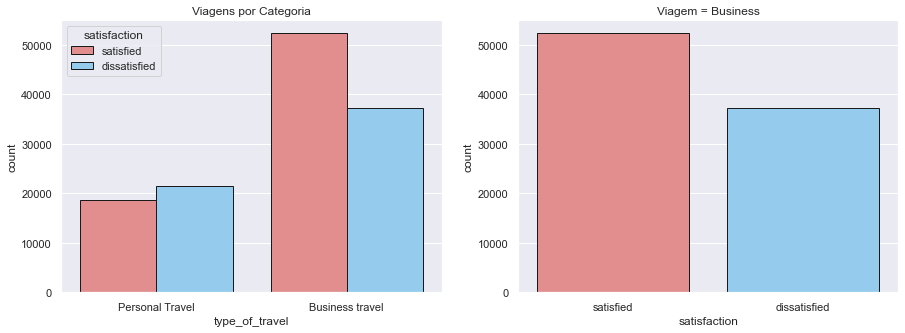

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='type_of_travel', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Viagens por Categoria')

plt.subplot(1, 2, 2)
filter_h2 = data[data['type_of_travel'] == 'Business travel']
sns.countplot(x='satisfaction', data=filter_h2, ec='k', palette=paleta2)
plt.title('Viagem = Business');

### H3. Passageiros da classe Eco possuem menor satisfação.

**VERDADEIRA** Passageiros da classe Eco possuem MENOR satisfação.

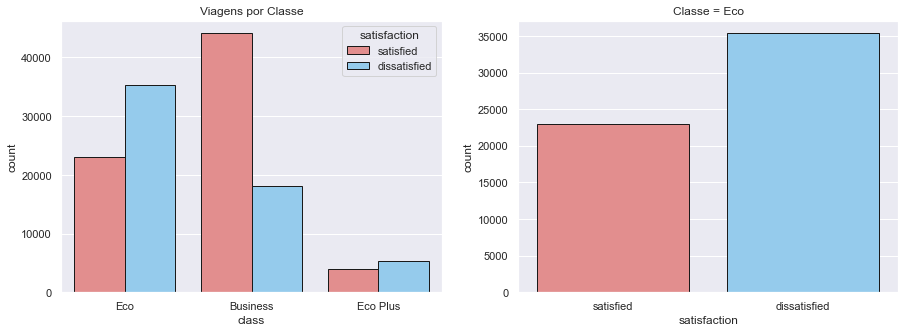

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='class', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Viagens por Classe')

plt.subplot(1, 2, 2)
filter_h3 = data[data['class'] == 'Eco']
sns.countplot(x='satisfaction', data=filter_h3, ec='k', palette=paleta2)
plt.title('Classe = Eco');

### H4.  Viagens com distancias menores possuem mais passageiros satisfeitos.

**VERDADEIRA** Viagens com distâncias MENORES possuem passageiros MAIS satisfeitos.

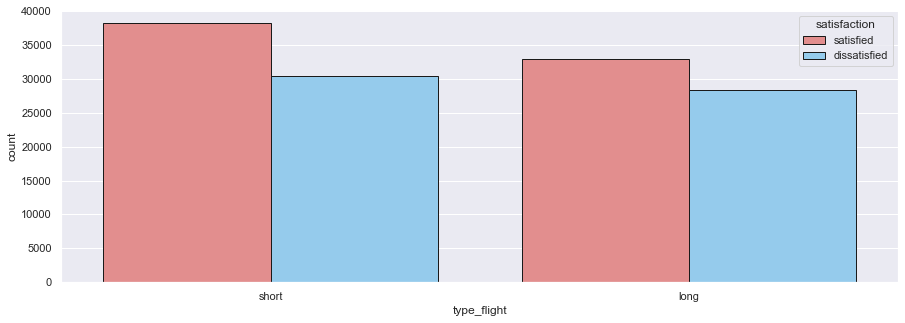

In [21]:
plt.figure(figsize=(15, 5))
sns.countplot(x='type_flight', data=data, hue=data['satisfaction'], palette=paleta2, ec='k');

### H5. Aviões com poltronas de melhor conforto possuem passageiros mais satisfeitos.

**VERDADEIRA** Poltronas melhores possuem MAIOR satisfação.

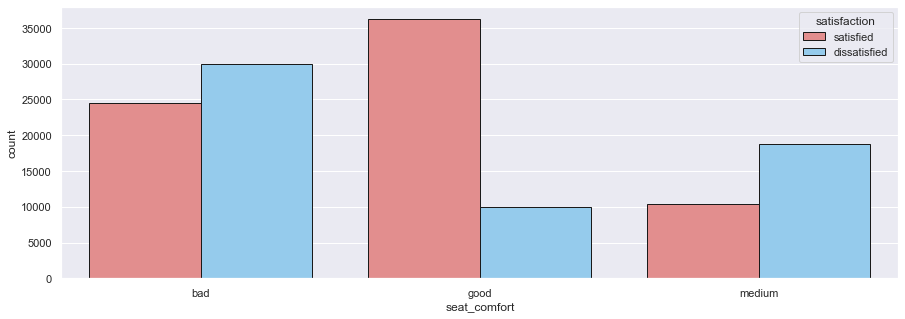

In [22]:
plt.figure(figsize=(15, 5))
sns.countplot(x='seat_comfort', data=data, hue=data['satisfaction'], palette=paleta2, ec='k');

### H6. Aviões que saem com atrasos curtos possuem mais passageiros satisfeitos.

**VERDADEIRA** Aviões que saem com trasos curtos possuem MAIOR satisfação.

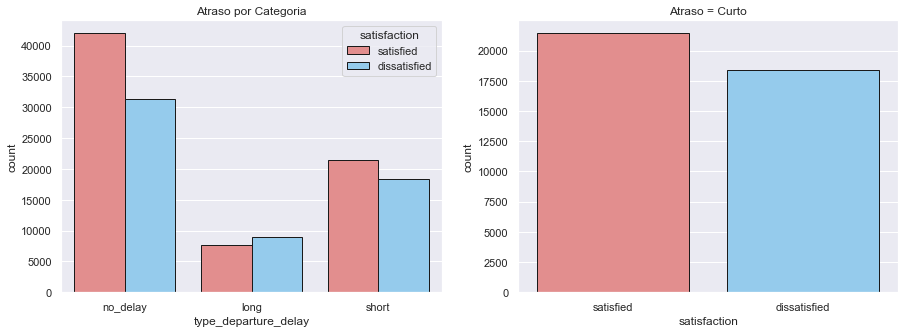

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='type_departure_delay', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Atraso por Categoria');

plt.subplot(1, 2, 2)
filter_h4 = data[data['type_departure_delay'] == 'short']
sns.countplot(x='satisfaction', data=filter_h4, ec='k', palette=paleta2)
plt.title('Atraso = Curto');

### H7. Aviões que saem com atrsasos longos possuem mais passageiros insatisfeitos.

**FALSA** Aviões que saem com atrasos longos possuem MENOS passageiros satisfeitos.

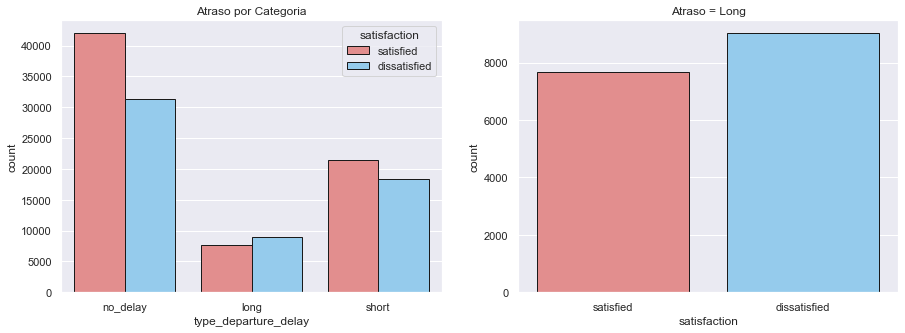

In [24]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='type_departure_delay', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Atraso por Categoria');

plt.subplot(1, 2, 2)
filter_h5 = data[data['type_departure_delay'] == 'long']
sns.countplot(x='satisfaction', data=filter_h5, ec='k', palette=paleta2)
plt.title('Atraso = Long');

### H8. Aviões com maior cuidado em limpeza possuem mais passageiros satisfeitos.

**VERDADEIRA** Aviões com boa limpeza possuem MAIOR satisfação.

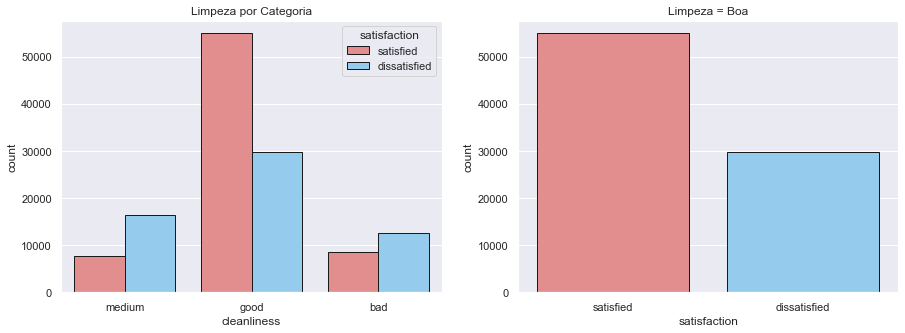

In [25]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='cleanliness', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Limpeza por Categoria')

plt.subplot(1, 2, 2)
filter_h6 = data[data['cleanliness'] == 'good']
sns.countplot(x='satisfaction', data=filter_h6, palette=paleta2, ec='k')
plt.title('Limpeza = Boa');

### H9. Vôos com bom entretenimento possuem maior satisfação.

**VERDADEIRA** Vôos com bom entretenimento possuem MAIOR satisfação.

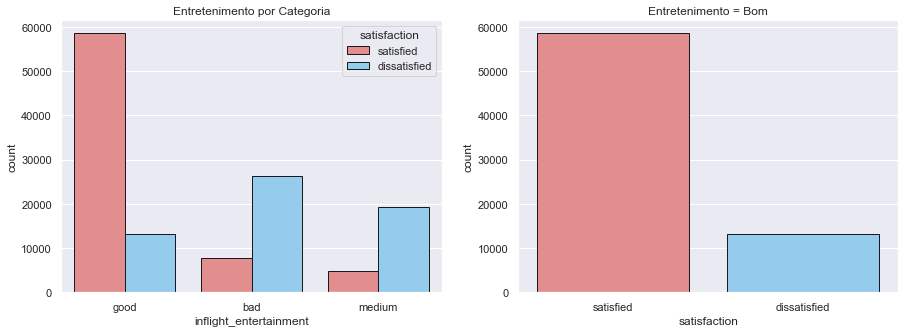

In [26]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='inflight_entertainment', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Entretenimento por Categoria')

plt.subplot(1, 2, 2)
filter_h6 = data[data['inflight_entertainment'] == 'good']
sns.countplot(x='satisfaction', data=filter_h6, palette=paleta2, ec='k')
plt.title('Entretenimento = Bom');

### H10. Vôos com localização do portão de embarque ruim possuem MENOR satisfação.

**FALSA** Vôos com localização do portão de embarque ruim possuem MAIOR satisfação.

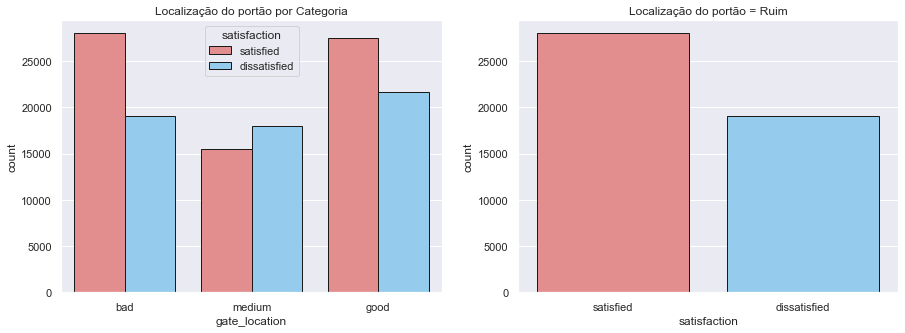

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='gate_location', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Localização do portão por Categoria')

plt.subplot(1, 2, 2)
filter_h6 = data[data['gate_location'] == 'bad']
sns.countplot(x='satisfaction', data=filter_h6, palette=paleta2, ec='k')
plt.title('Localização do portão = Ruim');

### H11. Vôos com manuseio de bagagens ruim e mediano possuem menor satisfação.

**VERDADEIRA** Vôos com manuseio de bagagens ruim e mediano possuem MENOR satisfação.

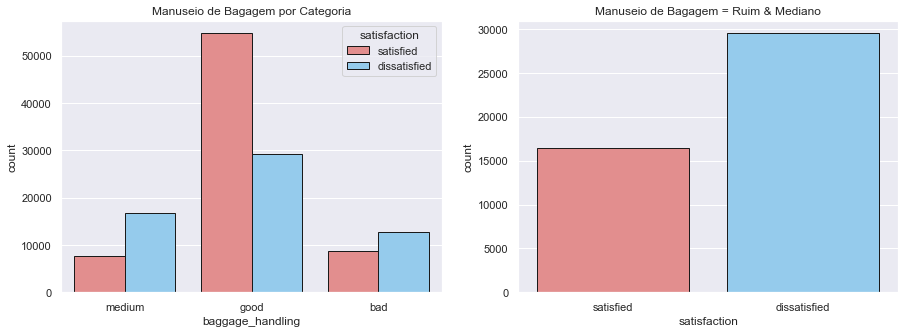

In [28]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='baggage_handling', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Manuseio de Bagagem por Categoria')

plt.subplot(1, 2, 2)
filter_h6 = data[(data['baggage_handling'] == 'bad') | (data['baggage_handling'] == 'medium')]
sns.countplot(x='satisfaction', data=filter_h6, palette=paleta2, ec='k')
plt.title('Manuseio de Bagagem = Ruim & Mediano');

### H12. Vôos com comida e bebida ruim possuem maior insatisfação.

**FALSA** Vôos com comida e bebida ruim possuem praticamente a mesma quantidade de insatisfação e satisfação.

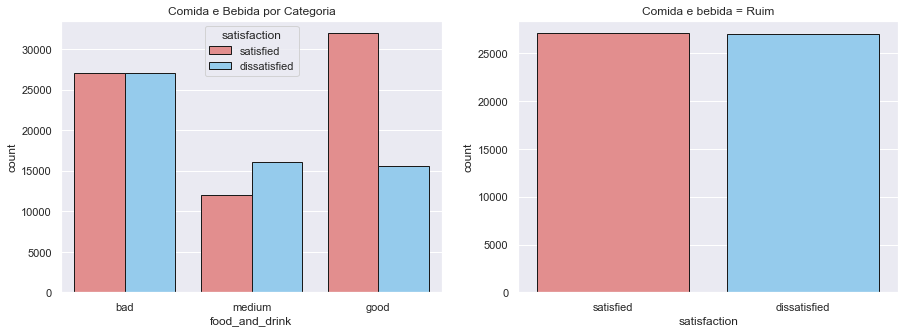

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='food_and_drink', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Comida e Bebida por Categoria')

plt.subplot(1, 2, 2)
filter_h6 = data[data['food_and_drink'] == 'bad']
sns.countplot(x='satisfaction', data=filter_h6, palette=paleta2, ec='k')
plt.title('Comida e bebida = Ruim');

### H13. Vôos com boa conexão Wi-fi no avião possuem maior satisfação.

**VERDADEIRA** Boa conexão Wifi possuem mais passageiros satisfeitos.

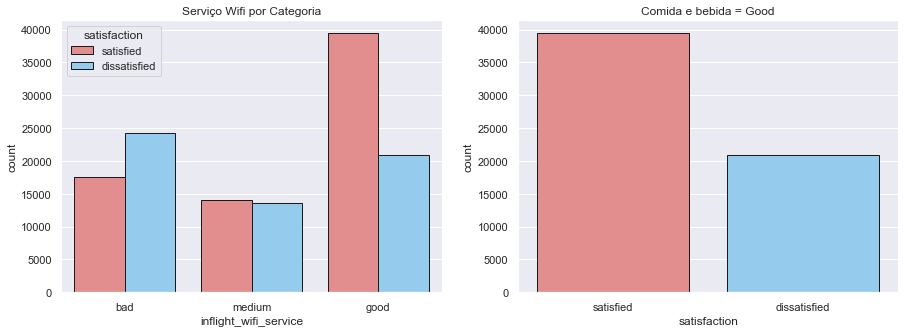

In [30]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='inflight_wifi_service', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Serviço Wifi por Categoria')

plt.subplot(1, 2, 2)
filter_h6 = data[data['inflight_wifi_service'] == 'good']
sns.countplot(x='satisfaction', data=filter_h6, palette=paleta2, ec='k')
plt.title('Comida e bebida = Good');

### H14. Vôos com bons serviços de quarto possuem maior satisfação.

**VERDADEIRA** Vôos com bons serviçoes de quarto possuem MAIOR satisfação.

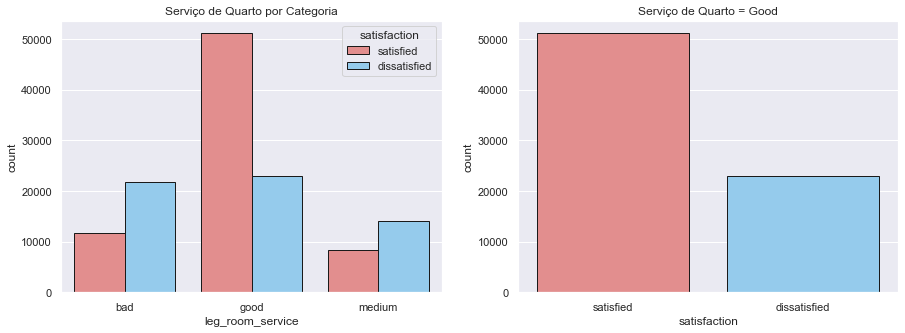

In [31]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='leg_room_service', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Serviço de Quarto por Categoria')

plt.subplot(1, 2, 2)
filter_h6 = data[data['leg_room_service'] == 'good']
sns.countplot(x='satisfaction', data=filter_h6, palette=paleta2, ec='k')
plt.title('Serviço de Quarto = Good');

### H15. Vôos com pior serviço de check-in possuem menor satisfação.

**VERDADEIRA** Vôos com pior serviço de check-in possuem MENOR satisfação.

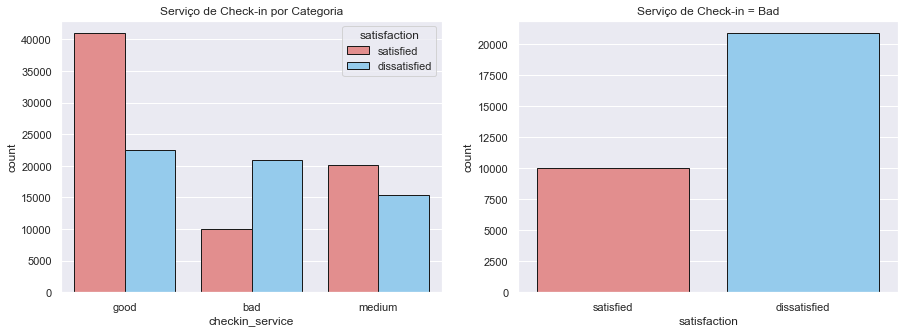

In [32]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='checkin_service', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Serviço de Check-in por Categoria')

plt.subplot(1, 2, 2)
filter_h6 = data[data['checkin_service'] == 'bad']
sns.countplot(x='satisfaction', data=filter_h6, palette=paleta2, ec='k')
plt.title('Serviço de Check-in = Bad');

### H16. Atendimentos com maior dificuldade na reserva possuem menos clientes satisfeitos.

**VERDADEIRA** Atendimentos com MAIOR dificuldade na reserva possuem MENOR satisfação.

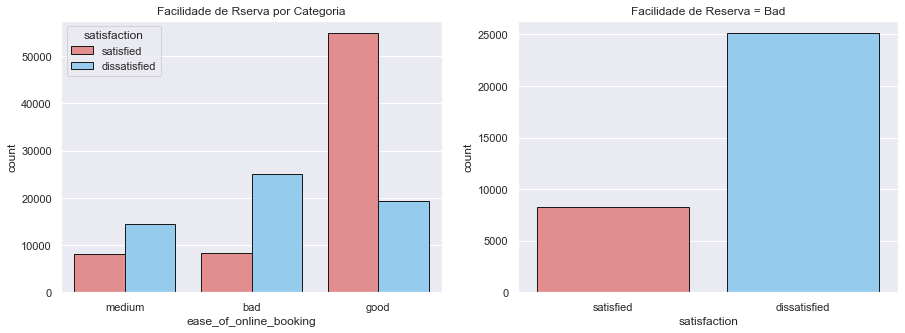

In [33]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='ease_of_online_booking', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Facilidade de Rserva por Categoria')

plt.subplot(1, 2, 2)
filter_h6 = data[data['ease_of_online_booking'] == 'bad']
sns.countplot(x='satisfaction', data=filter_h6, palette=paleta2, ec='k')
plt.title('Facilidade de Reserva = Bad');

### H17. Atendimentos com piores suportes online possuem menos clientes satisfeitos.

**VERDADEIRO** Atendimentos com piores suportes online possuem MENOR satisfação.

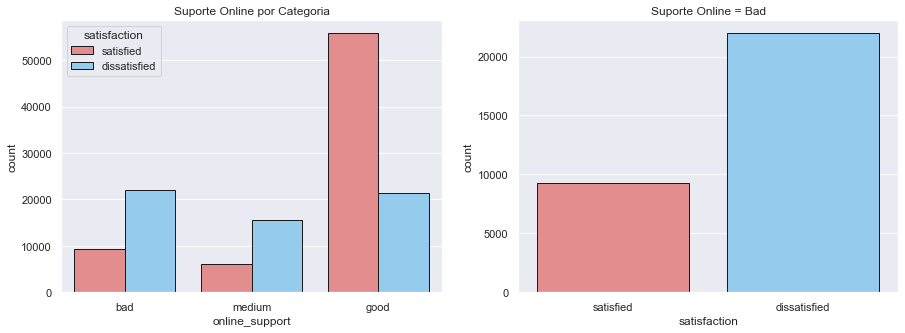

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='online_support', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Suporte Online por Categoria')

plt.subplot(1, 2, 2)
filter_h6 = data[data['online_support'] == 'bad']
sns.countplot(x='satisfaction', data=filter_h6, palette=paleta2, ec='k')
plt.title('Suporte Online = Bad');

### H18. Atendimento com piores Onboards possuem menos clientes satisfeitos.

**VERDADEIRA** Atendimentos com piores Onboards possuem MENOR satisfação.

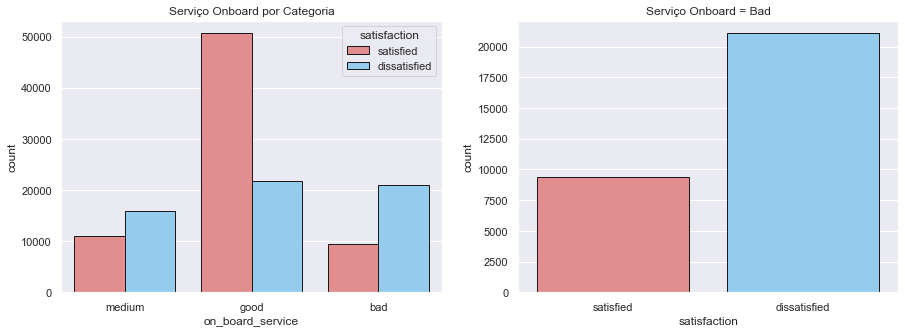

In [35]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='on_board_service', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Serviço Onboard por Categoria')

plt.subplot(1, 2, 2)
filter_h6 = data[data['on_board_service'] == 'bad']
sns.countplot(x='satisfaction', data=filter_h6, palette=paleta2, ec='k')
plt.title('Serviço Onboard = Bad');

### H19. Atendimento com piores Onboards online possuem menos clientes satisfeitos.

**VERDADEIRA** Atendimentos com piores Onboards online possuem MENOR satisfação.

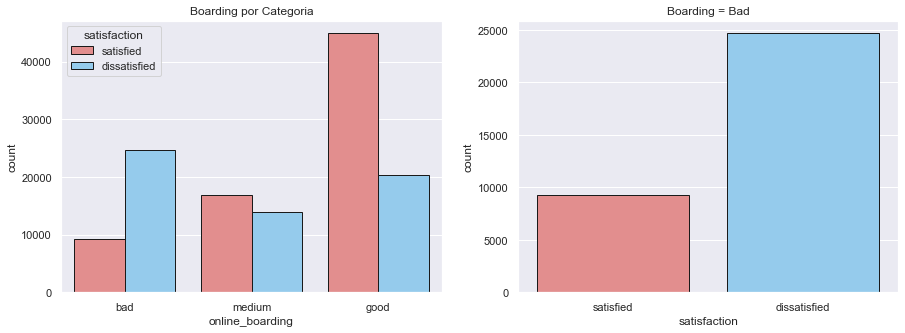

In [36]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='online_boarding', data=data, hue=data['satisfaction'], palette=paleta2, ec='k')
plt.title('Boarding por Categoria')

plt.subplot(1, 2, 2)
filter_h6 = data[data['online_boarding'] == 'bad']
sns.countplot(x='satisfaction', data=filter_h6, palette=paleta2, ec='k')
plt.title('Boarding = Bad');

### 5.3 Análise Multivariada

#### 5.3.1 Variavel Numérica

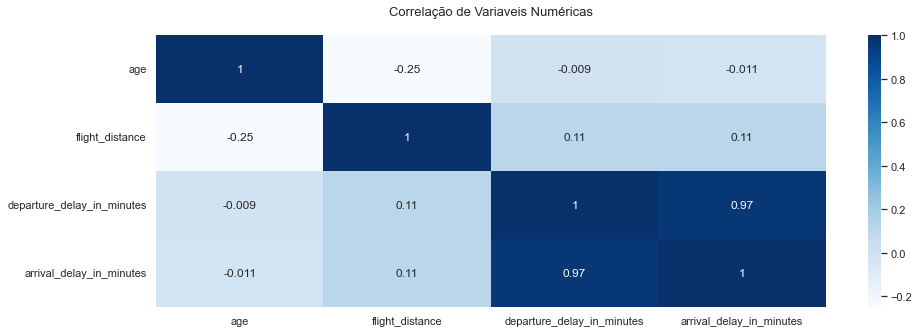

In [37]:
plt.figure(figsize=(15, 5))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='Blues')
plt.title('Correlação de Variaveis Numéricas\n', fontsize=13);

Curiosamente, a idade possui uma cerca correlação negativa com a distância de vôo do passageiro, ou seja, a medida que a idade aumenta a distância do vôo diminui. E como já esperado, o horário de partida do avião tem uma grande correlação com o horário de chegada no destino. No restante das variaveis, não há grande correlação.

#### 5.3.2 Variavel Categórica

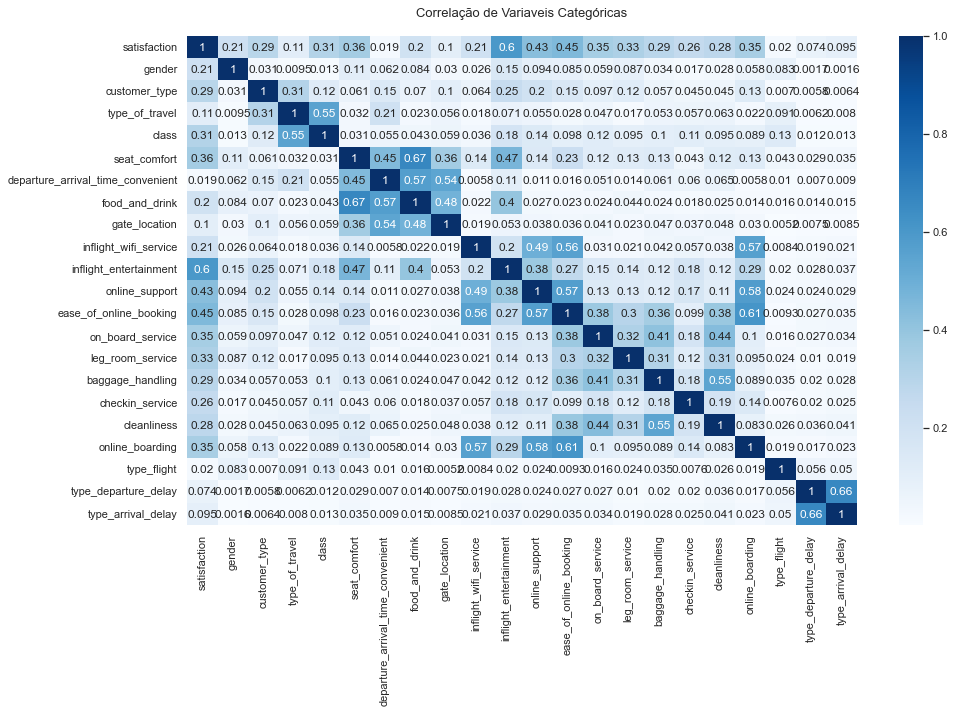

In [38]:
a = data.select_dtypes(include='object')

matrix = show_matrix(data=a, col='satisfaction', output='dict')

data_columns = a.iloc[:, 1:]

for c in data_columns.columns:
    matrix[c] = show_matrix(data=a, col=c, output='list')

plt.figure(figsize=(15, 9))
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.title('Correlação de Variaveis Categóricas\n', fontsize=13);

O entretenimento do vôo é a variável que mais se correlaciona com a satisfação dos passageiros. Duas outras que estão menos, mas que ainda possui correlação, é o suporte online e a facilidade de reserva. Pergunta: Se melhorarmos estes serviços, a satisfação aumentará? bom, talvez, antes disso é importante analisar quais variaveis impactam também estes serviços.

No caso do entretenimento, há uma certa correlação com o conforto da poltrona e com as comidas/bebidas. Já o suporte online, se correlaciona com a facilidade de reserva online, serviço Wifi aéreo e com o embarque online. A facilidade de reserva, está correlacionada também com o Wifi aéreo, suporte online e com o embarque online, que há a maior correlação.

## 6.0 HIPÓTESES ADICIONAIS

### H20. Entre todos os serviços, o entretenimento do vôo é o pior.

**FALSA** Entre todos os serviços, o conforto da poltrona é o PIOR.

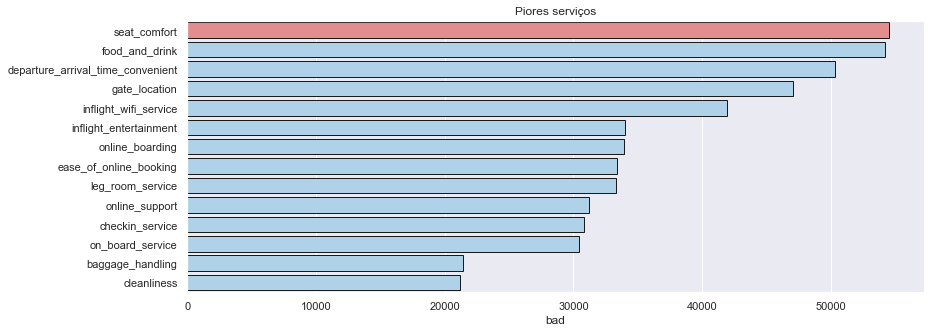

In [39]:
service = ['seat_comfort', 'departure_arrival_time_convenient', 'food_and_drink', 'gate_location',
           'inflight_wifi_service', 'inflight_entertainment', 'online_support', 'ease_of_online_booking',
           'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 'cleanliness',
           'online_boarding']

count_bad = []
index = []
paleta = []
count = 0 

for i in service:
    
    filter_h20 = len(data[data[i] == 'bad'])
    count_bad.append(filter_h20)
    index.append(i)

service_bad = pd.DataFrame(count_bad, columns=['bad'], index=index)
plt.figure(figsize=(13.2, 5))

order = service_bad['bad'].sort_values(ascending=False).index
for svc in order:
    count += 1
    
    if count == 1:
        paleta.append('#f08080')
        
    else:
        paleta.append('#a5d4f2')
        
sns.barplot(y=service_bad.index, x=service_bad['bad'], ec='k', order=order, palette=paleta)
plt.title('Piores serviços');

### H21. Passageiros da classe Eco possuem maior problema com os serviços

**VERDADEIRA** Passageiros da classe Eco possuem maior problema em 9 de 14 serviços.

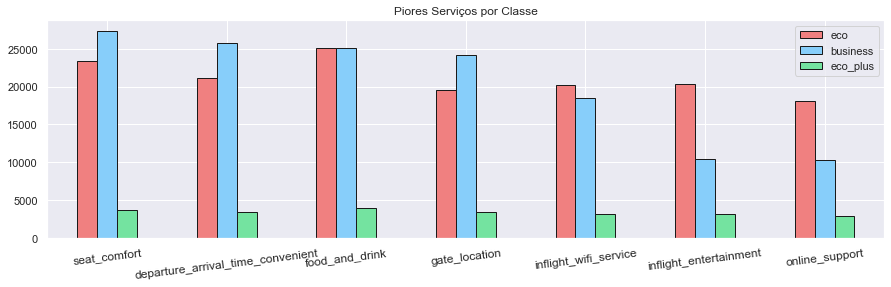

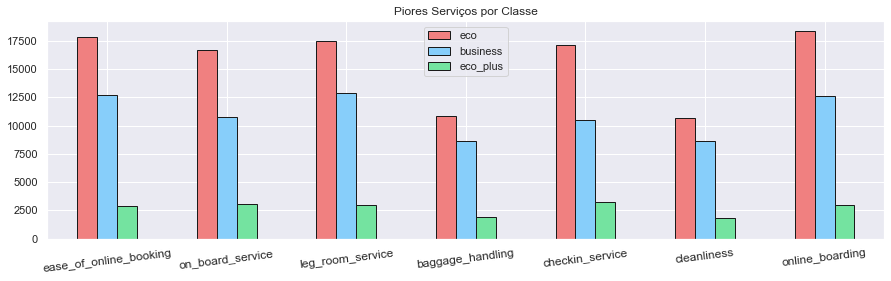

In [40]:
top5_bad = ['seat_comfort', 'departure_arrival_time_convenient', 'food_and_drink',
            'gate_location', 'inflight_wifi_service', 'inflight_entertainment',
            'online_support', 'ease_of_online_booking', 'on_board_service',
            'leg_room_service', 'baggage_handling', 'checkin_service',
            'cleanliness', 'online_boarding']

list_eco = []
list_business = []
list_ecoPlus = []
columns = []

for top5 in top5_bad:

    eco = data[(data[top5 ] == 'bad') & (data['class'] == 'Eco')]
    business = data[(data[top5 ] == 'bad') & (data['class'] == 'Business')]
    eco_plus = data[(data[top5 ] == 'bad') & (data['class'] == 'Eco Plus')]
    
    list_eco.append(len(eco))
    list_business.append(len(business))
    list_ecoPlus.append(len(eco_plus))
    columns.append(top5)

data_service = pd.DataFrame({'eco': list_eco, 'business': list_business,
                             'eco_plus': list_ecoPlus}, index=columns)

service1 = data_service.iloc[:7]
service2 = data_service.iloc[7:]

service1.plot(kind='bar', color=paleta3, ec='k', figsize=(15, 4))
plt.xticks(rotation=0, fontsize=12)
plt.title('Piores Serviços por Classe')
plt.xticks(rotation=7)

service2.plot(kind='bar', color=paleta3, ec='k', figsize=(15, 4))
plt.xticks(rotation=0, fontsize=12)
plt.title('Piores Serviços por Classe')
plt.xticks(rotation=7);

## 7.0 RESULTADO

Perfil dos passageiros insatisfeitos: A maior parte da insatisfação está na classe Eco de Viagens pessoais. Passageiros com idade maior que 30 anos e sendo clientes Fiéis.


Melhorias a serem feitas: Mesmo possuindo a maior insatisfação na classe Eco, ainda há grande insatisfação na classe Business. Afim de garatir experiência nas duas principais classes da companhia é necessário melhorar os 4 piores serviços de ambas as classes.

**Melhorias classe Eco:** 

- Conforto da poltrona
- Comida/bêbida
- Previsão horário de chegada/partida conveniente
- Entretenimento.

**Melhorias classe Business:** 

- Conforto da proltrona
- Comida/bêbida
- Previsão horário de chegada/partida conveniente
- Localização do portão de embarque.

**Descrição para o negócio:**

Uma pesquisa realizada nos EUA comprova que são necessárias 12 novas experiências positivas para reparar o(s) dano(s) causado(s) por uma experiência negativa e segundo a Airbus, um avião comercial consome, em média, 12 litros a cada quilômetro.

Com base nisso, colocando o preço do litro como 3,50 de reais e a média de distância de vôo da Airline sendo 1981km. Gastaria em cerca de 83.202 de reais somente de gasolina para 1 vôo. Para cada cliente insatisfeito é necessário 12 novos Vôos para reparar, equivalendo à R$998.424.

**Retorno ao negócio:**

Com as mudanças, é esperado que a satisfação dos passageiros aumente em 15%, aumentando o atual percentual de 54% para 69% de satisfação. A airline gastará 83.202 de reais (1 vôo) para atribuir uma boa experiência, ao invés de 998.424 reais (12 vôos), economizando então, 914.616 em reais para fidelizar um cliente.

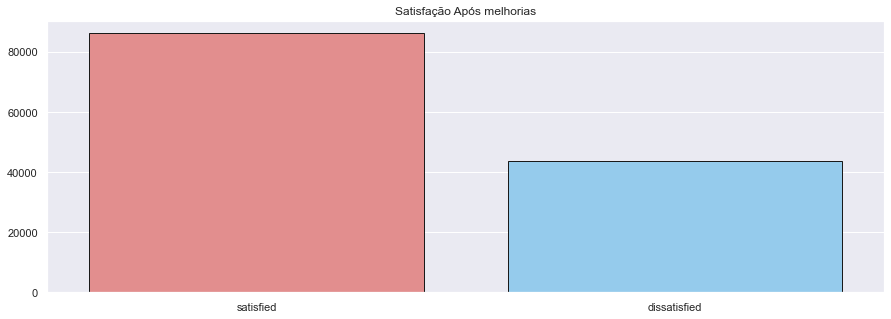

In [68]:
a = data['satisfaction'].value_counts()


plt.figure(figsize=(15, 5))
sns.barplot(x=a.index.values, y=[a[0] + 15000, a[1] - 15000], ec='k', palette=paleta3)
plt.title('Satisfação Após melhorias');

## 8.0 ENTREGA

In [41]:
eco = pd.DataFrame({'Idade': 'Maior que 30 anos', 'Sexo': 'Igual', 'Classe': 'Eco', 'Tipo da viagem': 'Pessoal',
                    'Melhoria': 'Conforto poltrona | Comida/bêbida | Previsão hora chegada/partida | Entretenimento'},
                   index=['melhoria_1'])

business = pd.DataFrame({'Idade': 'Maior que 30 anos', 'Sexo': 'Igual', 'Classe': 'Business', 'Tipo da viagem': 'Negócio',
                         'Melhoria': 'Conforto poltrona | Comida/bêbida | Previsão hora chegada/partida | Localização do portaão'},
                        index=['melhoria_2'])

result = pd.concat([eco, business])

result.to_excel('report.xlsx', index=False)